In [1]:
import pandas as pd

# Import Data

In [3]:
schiz_pre = pd.read_csv('data/schizophrenia_pre_features_tfidf_256.csv')
schiz_post = pd.read_csv('data/schizophrenia_post_features_tfidf_256.csv')

# High-Level Look at Datasets

## Preface

These datasets contain a very large number of features. For this project we have selected _one_ feature of interest: `substance_use_total`. In order to accomplish our EDA task for Sunday 21st November, we will have to filter our dataset - and associated EDA tasks - to focus exclusively on this feature.

In [4]:
schiz_pre = schiz_pre.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]
schiz_post = schiz_post.loc[:, ['subreddit', 'author', 'date', 'post', 'substance_use_total']]

## 'Pre' Dataset

In [5]:
schiz_pre.head(3)

,subreddit,author,date,post,substance_use_total
0,schizophrenia,KuntStain666,2019/01/09,Where can I possibly afford to live on disabil...,0
1,schizophrenia,winterWhiteout,2019/01/09,Taking psychedelics after being diagnosed with...,1
2,schizophrenia,marsmann5091,2019/01/09,Progress So I've barely had reddit. But it's r...,1


In [6]:
schiz_pre.tail(3)

,subreddit,author,date,post,substance_use_total
4278,schizophrenia,Sdcghfxz,2019/04/26,Is hypnagogia and closed eye visuals at night ...,0
4279,schizophrenia,choppinnfloppin,2019/04/26,I think I might be mildly schizophrenic/have s...,4
4280,schizophrenia,thefoxinthesnow87,2019/04/26,Was my Dad schizophrenic? My Dad died when I w...,4


In [7]:
print(f'Total number of records in this dataset: {len(schiz_pre)}')
schiz_pre.describe()

Total number of records in this dataset: 4281


,substance_use_total
count,4281.000000
mean,0.561084
std,1.196791
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,13.000000


So it doesn't look like we're missing any values in the `schizophrenia_pre_features_tfidf_256.csv` dataset.
Let's take a quick look at the distribution of number of mentions of substance use per post.

<AxesSubplot:ylabel='Frequency'>

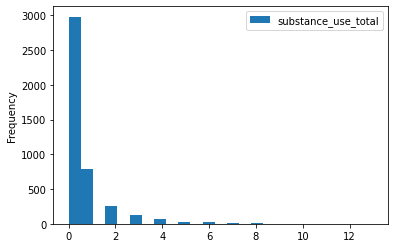

In [8]:
schiz_pre.plot.hist(bins=25)

## 'Post' Dataset

In [9]:
schiz_post.head(3)

,subreddit,author,date,post,substance_use_total
0,schizophrenia,TheMusiKid,2020/01/01,Does/did anyone else believe that they are/wer...,0
1,schizophrenia,Mhanderson13,2020/01/01,My illness has taken everything from me but my...,0
2,schizophrenia,gaylord678,2020/01/01,How to get a better therapist in a shit hole s...,0


In [12]:
schiz_post.tail(3)

,subreddit,author,date,post,substance_use_total
1860,schizophrenia,mute-box,2020/04/20,does anybody else sometimes avoid other people...,1
1861,schizophrenia,Randomguy02me,2020/04/20,I'm going back Today I made the call to go bac...,0
1862,schizophrenia,33night8,2020/04/20,Inappropriate emotions I am a 22 year old fema...,2


In [13]:
print(f'Total number of records in this dataset: {len(schiz_post)}')
schiz_post.describe()

Total number of records in this dataset: 1863


,substance_use_total
count,1863.000000
mean,0.529791
std,1.071077
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,11.000000


So it doesn't look like we're missing any values in the `schizophrenia_post_features_tfidf_256.csv` dataset.
Let's take a quick look at the distribution of number of mentions of substance use per post.

<AxesSubplot:ylabel='Frequency'>

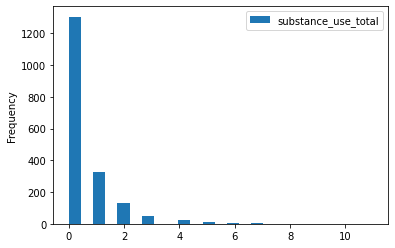

In [14]:
schiz_post.plot.hist(bins=25)

## High-Level Comparison of Pre-Post Datasets

In [15]:
pd.concat([schiz_pre.describe(), schiz_post.describe()], axis=1)

,substance_use_total,substance_use_total
count,4281.000000,1863.000000
mean,0.561084,0.529791
std,1.196791,1.071077
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,13.000000,11.000000


As you can see from the table above, there are far fewer records in the 'post' dataset. This is likely due to the fact that the 'post' dataset covers a far shorter period of time. As such, a simple comparison of the means of these two datasets should be taken with a grain of salt. A Z-test of comparison of means may be a good place to start with this dataset to understand if there is any significant difference between the means of these datasets

In [16]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(schiz_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(schiz_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 4281
Number of unique authors (posters) in 'post' dataset: 1863


So it looks as though **each** record/observation in each dataset is associated with a unique reddit user - which is great! That way we know we don't have - for example - an individual redditor who is contributing a disproportionate amount to our dataset. *Though* - it does then raise the question of how and why the assemblers of this dataset achieved this author-observation uniqueness.